In [61]:
#packages used

#packages to be downloaded
import numpy as np

import scipy.integrate as integrate
from scipy import linalg as la
import scipy.special as spl

import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}
plt.rc('font', **font)

#packages pre-installed
from math import pi,factorial,log

In [62]:
a = 1           #Crack Half-Length
nu = 0.25       #Poisson's Ratio
G = 26.2        #Shear Stress
E = 2*G*(1+nu)  #Young's Modulus
ks=(1-nu)/(2) #Plain stress Condition

In [63]:
degree = 20             #degree of Chebyshev's Approximation
order = degree + 1      #order of Chebyshev's Approximation

#values of x to use for plot
X = np.linspace(-a,a,order+1,False)
X = np.delete(X,0)
Y1 = np.linspace(-0.9999,X[0],10,False)
Y2 = np.linspace(0.9999,X[-1],10,False)
X = np.concatenate((X,Y1,Y2), axis=0)
X.sort()
order += 20

In [64]:
def term1(i,x):
    return spl.eval_legendre(i,x)

def beta(i,j,k):
    if (i - 2*k - j) % 2 == 0:
        return 0.0
    else:
        return float(2*((-1)**k)*factorial(2*(i - k)))/((2**i)*factorial(k)*factorial(i - 2*k)*factorial(i - k)*(i - 2*k - j))
    
def term2(i,x):
    final = 0.0
    for k in range(int(i)/2 +1):
        for j in range(i - 2*k):
            integrand = lambda z:beta(i,j,k)*(z**j)/((a**2 - z**2)**0.5)
            final += integrate.quad(integrand,-a,x)[0]
    return final

def term3(i,x):
    func = lambda z: (spl.eval_legendre(i,x) * log((a+z)/(a-z)))/((a**2 - z**2)**0.5)
    return integrate.quad(func,-a,x)[0]

def lhs(i,x,alphas):
    if alphas == 0:
        return term1(i,x)
    else:
        return term1(i,x) + ((a**2 - x**2)**0.5)*alphas*(term2(i,x) - term3(i,x))/(pi*(1-ks))

def rhs():
    RHS = np.zeros([order,])
    return (a**2 - X**2)/(2*(1-ks)*G)

In [65]:
def Legendre(alphas):
    LHS = np.zeros([order,order])
    for i in range(order):
        print i
        temp = np.zeros([order,])
        for j in range(order):
            temp[j] = lhs(j,X[i],alphas)
        LHS[i] = temp    
    RHS = rhs()
    C = la.solve(LHS,RHS)
    Sol = np.zeros([order,])
    for i in range(order):
        temp = 0.0
        for j in range(order):
            temp += C[j]*spl.eval_legendre(j,X[i])/((a**2 - X[i]**2)**0.5)
        Sol[i] = temp
    return 2*Sol

In [58]:
Sol_1 = Legendre(0.1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [59]:
Sol_2 = Legendre(0.2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [69]:
Sol_3 = Legendre(0.5)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [70]:
Classical = Legendre(0.0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


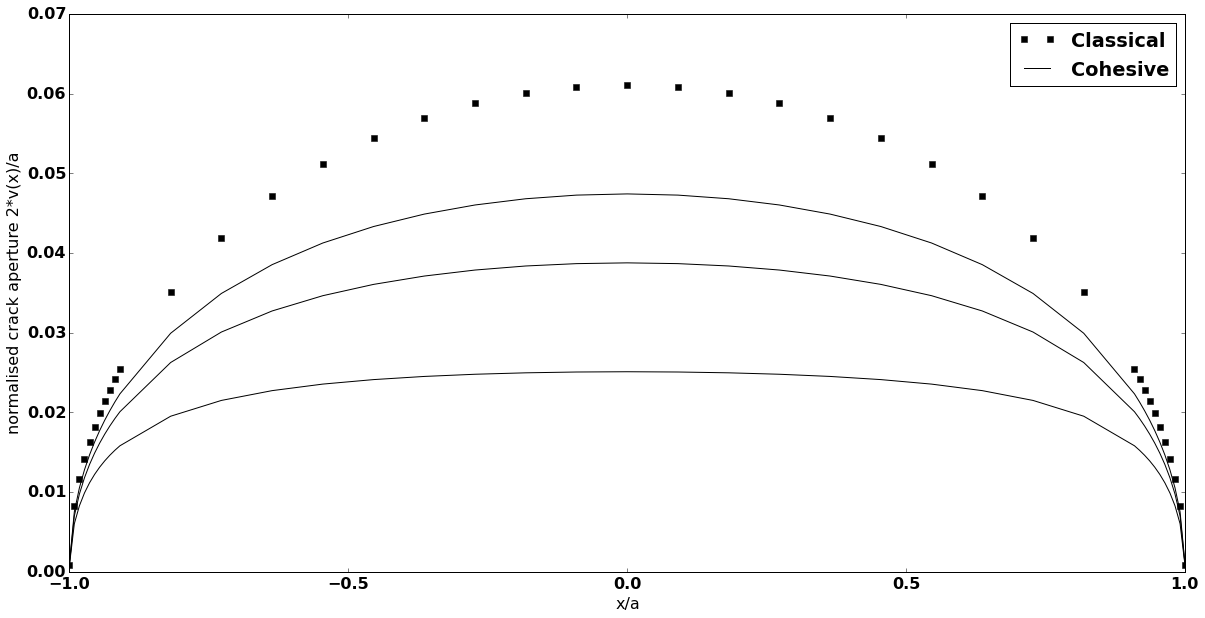

In [72]:
fig1 = plt.figure(num=1, figsize=(20, 10),
                  dpi=50, facecolor='w', edgecolor='k')
ax1 = plt.subplot(111)
ax1.set_xlabel('x/a')
ax1.set_ylabel('normalised crack aperture 2*v(x)/a')
ax1.plot(X,Classical,'s',color='k',label="Classical")
ax1.plot(X,Sol_1,'-',color='k',label="Cohesive")

ax1.plot(X,Sol_2,'-',color='k')
ax1.plot(X,Sol_3,'-',color='k')

plt.legend(loc=1)
plt.show()

In [73]:
fig1.savefig('Result.png')